<a href="https://colab.research.google.com/github/owilli38/DSBA-6211/blob/main/Logistics_owilli38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
dfOW = pd.read_csv('/content/Organics.csv')

In [ ]:
print(dfOW.head)

<bound method NDFrame.head of              ID  DemAffl  DemAge DemGender PromClass  PromSpend  PromTime  \
0           140     10.0    76.0         U      Gold   16000.00       4.0   
1           620      4.0    49.0         U      Gold    6000.00       5.0   
2           868      5.0    70.0         F    Silver       0.02       8.0   
3          1120     10.0    65.0         M       Tin       0.01       7.0   
4          2313     11.0    68.0         F       Tin       0.01       8.0   
...         ...      ...     ...       ...       ...        ...       ...   
22218  52834058     13.0    65.0         F    Silver    1500.00       5.0   
22219  52834376     15.0    73.0         U      Gold    6053.06      12.0   
22220  52837057      9.0    70.0         F      Gold    6000.00       5.0   
22221  52838096     11.0    66.0         F    Silver    5000.00       5.0   
22222  52856469      3.0    75.0       NaN      Gold    6000.00       2.0   

       TargetBuy  
0              0  
1      


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         22223 non-null  int64  
 1   DemAffl    21138 non-null  float64
 2   DemAge     20715 non-null  float64
 3   DemGender  19711 non-null  object 
 4   PromClass  22223 non-null  object 
 5   PromSpend  22223 non-null  float64
 6   PromTime   21942 non-null  float64
 7   TargetBuy  22223 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB
None

Summary Statistics:
                 ID       DemAffl        DemAge      PromSpend      PromTime  \
count  2.222300e+04  21138.000000  20715.000000   22223.000000  21942.000000   
mean   2.605540e+07      8.711893     53.797152    4420.590041      6.564670   
std    1.507497e+07      3.421125     13.206048    7559.047522      4.657113   
min    1.400000e+02      0.000000     18.000000       0.010000

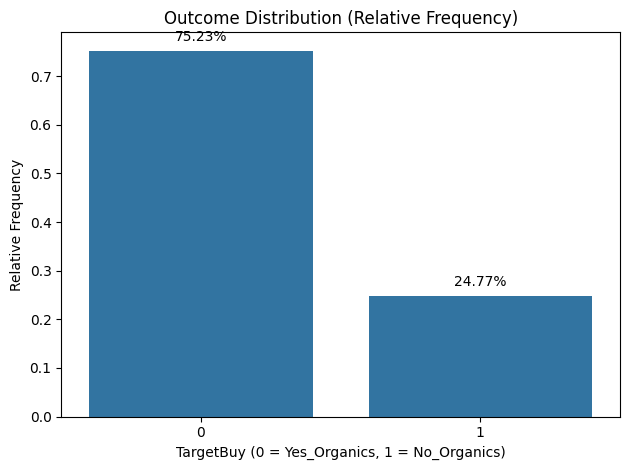

<ipython-input-41-6087eb928115>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfOW = dfOW.replace('M', 2)
<ipython-input-41-6087eb928115>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfOW = dfOW.replace('Platinum', 3)


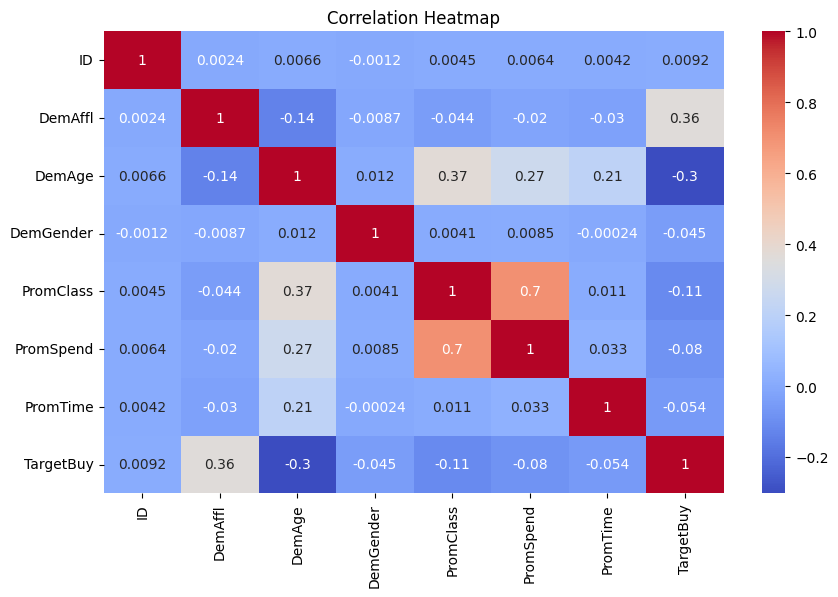

In [ ]:
#Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(dfOW.info())
print("\nSummary Statistics:")
print(dfOW.describe())

# Check for missing values
print("\nMissing Values Per Column:")
print(dfOW.isnull().sum())

# Visualize target distribution
outcome_counts = dfOW['TargetBuy'].value_counts(normalize=True)  # Relative frequencies
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title("Outcome Distribution (Relative Frequency)")
plt.xlabel("TargetBuy (0 = Yes_Organics, 1 = No_Organics)")
plt.ylabel("Relative Frequency")

# Annotate bars in relative frequency plot
for i, value in enumerate(outcome_counts.values):
    plt.text(i, value + 0.02, f"{value:.2%}", ha='center')

plt.tight_layout()
plt.show()

# Replace U with values NaN
dfOW = dfOW.replace('U', 0)
dfOW = dfOW.replace('F', 1)
dfOW = dfOW.replace('M', 2)

dfOW = dfOW.replace('Tin', 0)
dfOW = dfOW.replace('Silver', 1)
dfOW = dfOW.replace('Gold', 2)
dfOW = dfOW.replace('Platinum', 3)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfOW.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
for col in ['DemAffl', 'DemAge', 'PromTime']:
    dfOW[col].replace(0, np.nan, inplace=True)

# Impute missing values with median
dfOW.fillna(dfOW.median(), inplace=True)

<ipython-input-42-19f2fc925740>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfOW[col].replace(0, np.nan, inplace=True)


In [ ]:
# Step 4: Train-Test Split
X = dfOW.drop(['TargetBuy', 'ID', 'DemGender'], axis=1)  # Features
y = dfOW['TargetBuy']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dfOW_train = pd.concat([X_train, y_train], axis=1)
dfOW_train.name = 'dfOW.train'

dfOW_test = pd.concat([X_test, y_test], axis=1)
dfOW_test.name = 'dfOW.test'

print(dfOW_train.name)
print(dfOW_test.name)

dfOW.train
dfOW.test


In [ ]:
logisticOW = LogisticRegression(max_iter=1000)
logisticOW.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("Model Summary:")
print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))
print("Features:", X.columns.tolist())

print("Coefficients:", logisticOW.coef_)
print("Intercept:", logisticOW.intercept_)

# Class labels
print("Classes:", logisticOW.classes_)

# Number of iterations taken to converge
print("Number of Iterations:", logisticOW.n_iter_)

Model Summary:
Training Samples: 17778
Testing Samples: 4445
Features: ['DemAffl', 'DemAge', 'PromClass', 'PromSpend', 'PromTime']
Coefficients: [[ 2.46581952e-01 -5.43585580e-02 -3.13153610e-03 -4.90722216e-06
   2.10030767e-03]]
Intercept: [-0.56830093]
Classes: [0 1]
Number of Iterations: [179]


In [ ]:
X_train_sm = sm.add_constant(X_train)  # Add a constant for the intercept term
logitOW = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.464378
         Iterations 6


In [ ]:
print(logitOW.summary())  # Print a detailed summary including p-values
p_values = logitOW.pvalues  # Get p-values as a pandas Series
print("\nP-values:\n", p_values)

                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                17778
Model:                          Logit   Df Residuals:                    17772
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.1694
Time:                        14:09:18   Log-Likelihood:                -8255.7
converged:                       True   LL-Null:                       -9939.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5684      0.101     -5.637      0.000      -0.766      -0.371
DemAffl        0.2466      0.006     38.632      0.000       0.234       0.259
DemAge        -0.0544      0.002    -31.050      0.0


Model Accuracy: 0.7986501687289089

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      3332
           1       0.72      0.32      0.45      1113

    accuracy                           0.80      4445
   macro avg       0.76      0.64      0.66      4445
weighted avg       0.79      0.80      0.77      4445



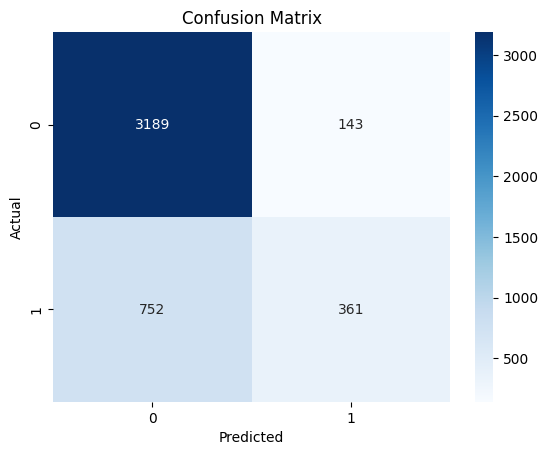

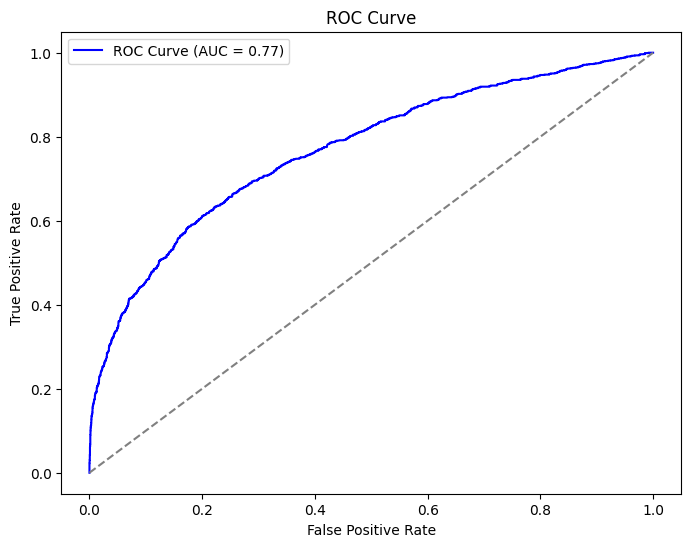

<ipython-input-48-fec6bf51858f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')


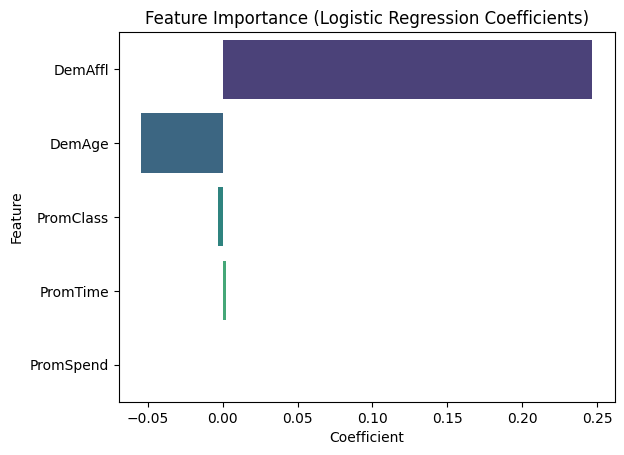

In [ ]:
y_pred = logisticOW.predict(X_test)
y_prob = logisticOW.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
sklearn_accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", sklearn_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Step 7: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logisticOW.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

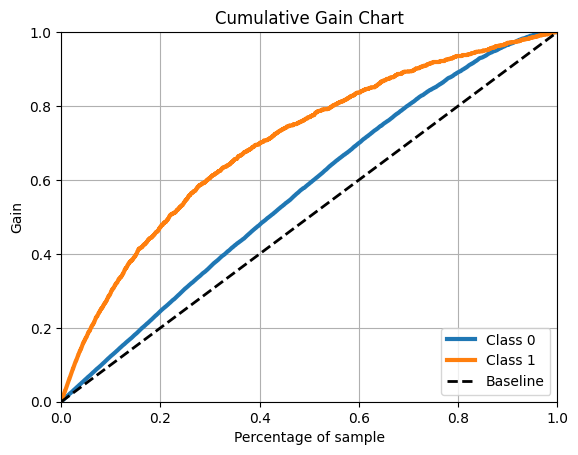

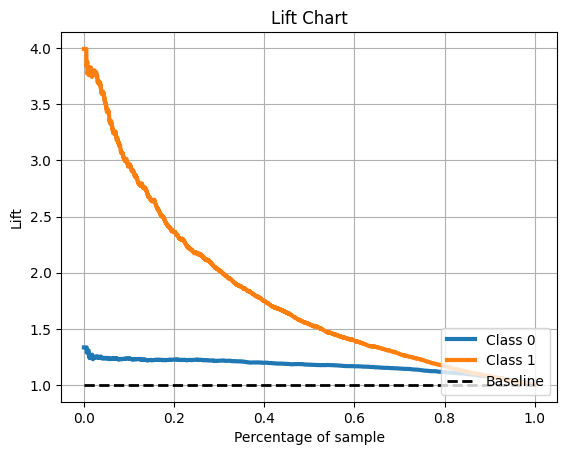

In [ ]:
# Use the predicted probabilities from your sklearn model
y_proba_sklearn = logisticOW.predict_proba(X_test)

# Plot the Gain Chart
skplt.metrics.plot_cumulative_gain(y_test, y_proba_sklearn)
plt.title("Cumulative Gain Chart")
plt.show()

# Plot the Lift Chart
skplt.metrics.plot_lift_curve(y_test, y_proba_sklearn)
plt.title("Lift Chart")
plt.show()